In [7]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

u = cp.Variable(1)
a = cp.Parameter(value=0.7)
b = cp.Parameter(value=0.1)

# x >= 0 + t = u
# x <= 1 + 0.3*t only valid till t = 1/0.7. But for some time horizon, it should be possible to keep the constraints

def xdot(x,u):
    return u


def simulate_simple(x0,av,bv,c,movie_name=None):
    t = 0
    dt = 0.01
    N = int(1.0/(1.0-c)*100)
    x = x0
    
    a.value = av
    b.value = bv
    
    xs = [x]
    ts = [0]

    if movie_name==None:
        movie_name = 'temp.mp4'
   
    fig = plt.figure(figsize=(2, 0.5))
    ax = plt.axes(xlim=(-0.5,2),ylim=(-0.05,0.05))
    plt.ion()
    car1 = ax.scatter([t],[0],c='r',s=10)            
    car2 = ax.scatter([1 + c*t],[0],c='r',s=10)
    vehicle = ax.scatter([x0],[0],c='g',s=10)
    metadata = dict(title='Movie Test', artist='Matplotlib',comment='Movie support!')
    writer = FFMpegWriter(fps=15, metadata=metadata)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)    
    
#     if 1:
    with writer.saving(fig, movie_name, 100): 

        for i in range(N):

            #h1
            h1 = x - t # x>=t
            h1_dot = xdot(x,u) - 1

            #h2
            h2 = 1 + c*t - x  #x <= 1 + 0.3t
            h2_dot = c - xdot(x,u)

            if h1<0 or h2<0:
                print("************* ERROR ****************")

            #constraints
            const = [h1_dot >= -a*h1]
            const += [h2_dot >= -b*h2]

            objective = cp.Maximize(u)
            problem = cp.Problem(objective,const)
            problem.solve(verbose=False)
            if problem.status != 'optimal':
                print(f"PROBLEM INFEASIBLE at :{i}, a:{a.value}, b:{b.value}")
                return i, xs, ts
                break

            x = x + xdot(x,u.value)*dt
    
            t += dt
            xs.append(x)
            ts.append(t)
            
                      
            fig.canvas.draw()
            fig.canvas.flush_events()

            car1.set_offsets([t,0])
            car2.set_offsets([1+c*t,0])
            vehicle.set_offsets([x,0])
            writer.grab_frame()
            
    if i==N-1:
        print("Problem Successful",t)
    return i+1, xs, ts
    


In [35]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 2.5
B = 4.5
_, x1, t1 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :104, a:2.5, b:4.5


In [36]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 0.5
B = 1.5
_, x2, t2 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :32, a:0.5, b:1.5


In [37]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 1.0
B = 3.0
_, x3, t3 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :64, a:1.0, b:3.0


In [38]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 4.0
B = 1.0
_, x4, t4 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :98, a:4.0, b:1.0


In [39]:
#x=0.8, c  = 0.7
x0 = 0.1
e0 = 0.5
C = 0.3
A = 20.4
B = 1.0
_, x5, t5 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :87, a:20.4, b:1.0


In [40]:
#x=0.8, c  = 0.7
x0 = 0.1
e0 = 0.5
C = 0.3
A = 2.5
B = 4.5
_, x6, t6 = simulate_simple(x0,A,B,C)

PROBLEM INFEASIBLE at :104, a:2.5, b:4.5


/home/hardik/Desktop/Research/Safe-Learning-DASC/venv_sl_dasc/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


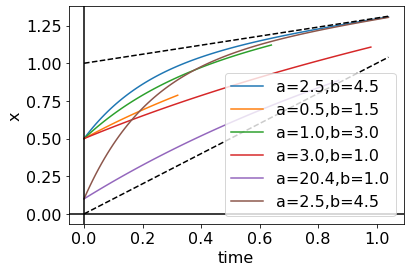

In [41]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

plt.plot(t1,x1,label='a=2.5,b=4.5')
plt.plot(t2,x2,label='a=0.5,b=1.5')
plt.plot(t3,x3,label='a=1.0,b=3.0')
plt.plot(t4,x4,label='a=3.0,b=1.0')
plt.plot(t5,x5,label='a=20.4,b=1.0')
plt.plot(t6,x6,label='a=2.5,b=4.5')


tmax = max(max(t1),max(t2))
t = np.linspace(0,tmax,30)
b1 = t
b2 = 1 + C*t

plt.axhline(y=0.0, color='k', linestyle='-')
plt.axvline(x=0.0, color='k', linestyle='-')

plt.plot(t,b1,'k--')
plt.plot(t,b2,'k--')
plt.xlabel('time')
plt.ylabel('x')

plt.legend()

plt.savefig("paths_example1.png")
plt.savefig("paths_example1.eps")

PROBLEM INFEASIBLE at :104, a:2.5, b:4.5


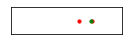

In [8]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 2.5
B = 4.5
_, x_1, t_1 = simulate_simple(x0,A,B,C,movie_name='param1.mp4')

PROBLEM INFEASIBLE at :64, a:1.0, b:3.0


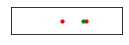

In [38]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 1.0
B = 3.0
_, x_2, t_2 = simulate_simple(x0,A,B,C,movie_name='param2.mp4')

PROBLEM INFEASIBLE at :91, a:3.0, b:1.0


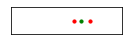

In [40]:
#x=0.8, c  = 0.7
x0 = 0.5
e0 = 0.5
C = 0.3
A = 3.0
B = 1.0
_, x_3, t_3 = simulate_simple(x0,A,B,C,movie_name='param3.mp4')

In [5]:
nsize = 20
x0 = 0.1
c = 0.7
A = np.linspace(0,5,nsize)
B = np.linspace(0,5,nsize)
horizons = np.zeros((nsize,nsize))
for i in range(nsize):
    for j in range(nsize):
        time_till_infeasibility , _, _ = simulate_simple(x0,A[i],B[j],c)
        horizons[i,j] = time_till_infeasibility
print("DONE")

PROBLEM INFEASIBLE at :0, a:0.0, b:0.0
PROBLEM INFEASIBLE at :0, a:0.0, b:0.2631578947368421
PROBLEM INFEASIBLE at :87, a:0.0, b:0.5263157894736842
PROBLEM INFEASIBLE at :109, a:0.0, b:0.7894736842105263
PROBLEM INFEASIBLE at :109, a:0.0, b:1.0526315789473684
PROBLEM INFEASIBLE at :104, a:0.0, b:1.3157894736842104
PROBLEM INFEASIBLE at :98, a:0.0, b:1.5789473684210527
PROBLEM INFEASIBLE at :92, a:0.0, b:1.8421052631578947
PROBLEM INFEASIBLE at :87, a:0.0, b:2.1052631578947367
PROBLEM INFEASIBLE at :82, a:0.0, b:2.3684210526315788
PROBLEM INFEASIBLE at :78, a:0.0, b:2.631578947368421
PROBLEM INFEASIBLE at :74, a:0.0, b:2.894736842105263
PROBLEM INFEASIBLE at :71, a:0.0, b:3.1578947368421053
PROBLEM INFEASIBLE at :67, a:0.0, b:3.4210526315789473
PROBLEM INFEASIBLE at :65, a:0.0, b:3.6842105263157894
PROBLEM INFEASIBLE at :62, a:0.0, b:3.9473684210526314
PROBLEM INFEASIBLE at :59, a:0.0, b:4.2105263157894735
PROBLEM INFEASIBLE at :57, a:0.0, b:4.473684210526316
PROBLEM INFEASIBLE at :55, 

PROBLEM INFEASIBLE at :264, a:1.5789473684210527, b:1.0526315789473684
PROBLEM INFEASIBLE at :269, a:1.5789473684210527, b:1.3157894736842104
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:1.5789473684210527
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:1.8421052631578947
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:2.1052631578947367
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:2.3684210526315788
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:2.631578947368421
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:2.894736842105263
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:3.1578947368421053
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:3.4210526315789473
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:3.6842105263157894
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:3.9473684210526314
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:4.2105263157894735
PROBLEM INFEASIBLE at :271, a:1.5789473684210527, b:4.473684210526316
PROBLEM I

PROBLEM INFEASIBLE at :277, a:3.1578947368421053, b:0.7894736842105263
PROBLEM INFEASIBLE at :293, a:3.1578947368421053, b:1.0526315789473684
PROBLEM INFEASIBLE at :299, a:3.1578947368421053, b:1.3157894736842104
PROBLEM INFEASIBLE at :301, a:3.1578947368421053, b:1.5789473684210527
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:1.8421052631578947
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:2.1052631578947367
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:2.3684210526315788
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:2.631578947368421
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:2.894736842105263
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:3.1578947368421053
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:3.4210526315789473
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:3.6842105263157894
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:3.9473684210526314
PROBLEM INFEASIBLE at :302, a:3.1578947368421053, b:4.2105263157894735
PROBLEM 

PROBLEM INFEASIBLE at :236, a:4.7368421052631575, b:0.5263157894736842
PROBLEM INFEASIBLE at :287, a:4.7368421052631575, b:0.7894736842105263
PROBLEM INFEASIBLE at :303, a:4.7368421052631575, b:1.0526315789473684
PROBLEM INFEASIBLE at :309, a:4.7368421052631575, b:1.3157894736842104
PROBLEM INFEASIBLE at :311, a:4.7368421052631575, b:1.5789473684210527
PROBLEM INFEASIBLE at :312, a:4.7368421052631575, b:1.8421052631578947
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:2.1052631578947367
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:2.3684210526315788
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:2.631578947368421
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:2.894736842105263
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:3.1578947368421053
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:3.4210526315789473
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:3.6842105263157894
PROBLEM INFEASIBLE at :313, a:4.7368421052631575, b:3.9473684210526314
PROBLEM 

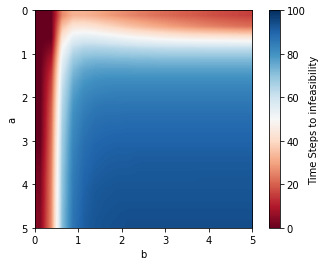

In [6]:
c = 0.7
fig2, ax2 = plt.subplots(1)
pos = ax2.imshow(horizons/(1.0/(1-c)),cmap='RdBu', interpolation='bilinear',extent=[0,5,5,0], vmin=0, vmax=100)
fig2.colorbar(pos, ax=ax2, label='Time Steps to infeasibility')
ax2.set_ylabel("a")
ax2.set_xlabel("b")
plt.show()